<a href="https://colab.research.google.com/github/manishsinha44/Machine-Learning/blob/main/SMS_Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [6]:
spam_df = pd.read_csv('emails.csv')

In [7]:
spam_df.shape

(5728, 2)

In [8]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [9]:
spam_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


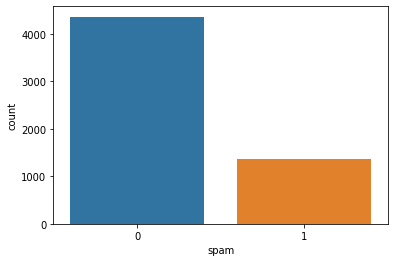

In [11]:
sns.countplot(x=spam_df['spam'])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer()

In [16]:
spam_vectorizer = vectorizer.fit_transform(spam_df['text'])

In [17]:
print(spam_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
from sklearn.naive_bayes import MultinomialNB
spam_nb = MultinomialNB()

In [19]:
spam_vectorizer.shape

(5728, 37303)

In [21]:
label = spam_df['spam'].values

In [22]:
spam_nb.fit(spam_vectorizer,label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [24]:
test_predict = spam_nb.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

In [25]:
X = spam_vectorizer
y = label

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [27]:
NB_classifier = MultinomialNB()

In [28]:
NB_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
y_pred = NB_classifier.predict(X_test)

In [30]:
y_train_pred = NB_classifier.predict(X_train)

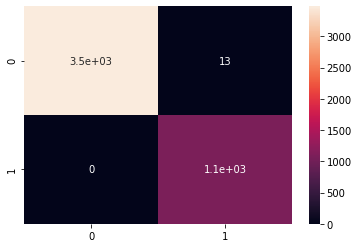

In [31]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

In [32]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3492
           1       0.99      1.00      0.99      1090

    accuracy                           1.00      4582
   macro avg       0.99      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582



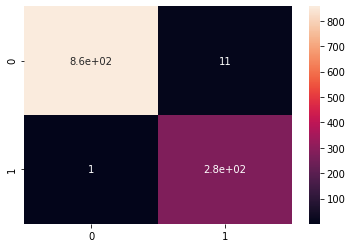

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [34]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       868
           1       0.96      1.00      0.98       278

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

